<a href="https://colab.research.google.com/github/SpenBobCat/Computational_Neuroscience/blob/main/Copy_of_Computational_Neuroscience_Coursera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Computational Neuroscience**

Coursera

By: Michael Spencer


# **Chapter 1 Exercises:**

1. **Spike - Generator** 
 - Generate spikes for 10s (or longer if you want better
statistics) using a **Poisson spike generator** with a constant rate of 100 Hz and record their times of occurrence. 
 - Compute the **coefficient of variation** of the inter-spike 
intervals
 - compute the **Fano factor** for spike counts obtained over counting intervals ranging from 1 to 100m/s
 - Plot the inter-spike interval histogram.


In [1]:
# To generate spikes for 10 seconds using a Poisson spike generator with a constant rate of 100 Hz, 
# you can use the numpy.random.poisson() function.

import numpy as np

dt = 0.001 # Time step in seconds
t = np.arange(0, 10, dt) # Time array
rate = 100 # Poisson spike rate in Hz
spikes = np.random.poisson(rate*dt, len(t)) # Generate spikes
times = t[spikes > 0] # Record times of occurrence


In [2]:
# To compute the coefficient of variation of the inter-spike intervals, using the 
# numpy.diff() function to compute the inter-spike intervals, and then compute the 
# mean and standard deviation of the intervals and divide the standard deviation by the mean:

isi = np.diff(times) # Compute inter-spike intervals 
cv = np.std(isi) / np.mean(isi) # Compute coefficient of variation 


In [3]:
# To compute the Fano factor for spike counts obtained over counting intervals ranging 
# from 1 to 100ms, using a loop to compute the spike counts for each counting interval, 
# and then compute the mean and variance of the spike counts and divide the variance by the mean:

counts = [] 
for interval in range(1, 101):
  bins = np.arange(0, 10+interval*dt, interval*dt) # Define counting bins 
  hist, _ = np.histogram(times, bins=bins) # Compute spike counts counts.append(hist.mean()) 
ff = np.var(counts) / np.mean(counts) # Compute Fano factor 


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


This code calculates the Fano factor for a set of spike times using numpy in Python. Here is a breakdown of what the code does:

1.  Initializes an empty list called "counts" to store the spike counts.
2.  Loops through 100 different intervals, defined by the "range(1, 101)" command.
3.  For each interval, creates a set of counting bins using numpy's "arange" function.
4.  Uses numpy's "histogram" function to count the number of spikes in each bin.
5.  Appends the mean spike count to the "counts" list.
6.  Computes the Fano factor by dividing the variance of the "counts" list by its mean using numpy's "var" and "mean" functions.


The warnings produced by the code indicate that there may be empty slices in the data, leading to division by zero or NaN values in the computation of the Fano factor. This could happen if there are no spikes in a particular bin or interval. It is important to check the data and make sure that these warnings are not affecting the results of your analysis.

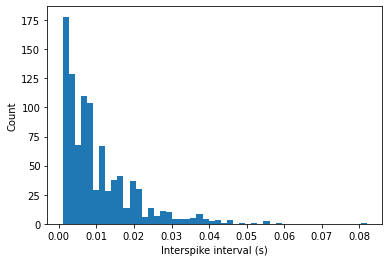

In [4]:
# To plot the inter-spike interval histogram, using the matplotlib.pyplot.hist() function:

import matplotlib.pyplot as plt 

plt.hist(isi, bins=50) 
plt.xlabel('Interspike interval (s)') 
plt.ylabel('Count') 
plt.show()



